In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data() 
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
classes[9]

'truck'

In [8]:
def plot_sample(x,y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

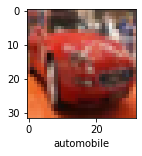

In [9]:
plot_sample(x_train, y_train, 5)

In [10]:
x_train[0]/ 255
x_test = x_test/ 255

In [11]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=1)

1563/1563 [==============================] - 70s 45ms/step - loss: nan - accuracy: 0.1001


In [12]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: nan - accuracy: 0.1000


[nan, 0.10000000149011612]

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 4s 13ms/step
classification Report: 
               precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



C:\Users\lenovo\Anaconda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\Anaconda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\Anaconda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=33, kernel_size=(3,3), activation='relu', input_shape=(32,32,3), padding="same"),
    layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
    
    layers.Conv2D(filters=33, kernel_size=(3,3), activation='relu', padding="same"),
    layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [71]:
cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [72]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.9648 - accuracy: 0.3793
Epoch 2/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.3475 - accuracy: 0.5183
Epoch 3/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.2062 - accuracy: 0.5749
Epoch 4/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.0918 - accuracy: 0.6189
Epoch 5/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.0051 - accuracy: 0.6485
Epoch 6/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9380 - accuracy: 0.6715
Epoch 7/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8793 - accuracy: 0.6947
Epoch 8/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.8218 - accuracy: 0.7120
Epoch 9/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.7868 - accuracy: 0.7255
Epoch 10/10
1563/1563 [==============================] - 48s 31m

In [73]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 2.6217 - accuracy: 0.1286


[2.6217451095581055, 0.12860000133514404]

In [76]:
y_test= y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

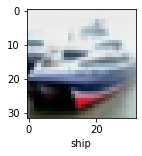

In [77]:
plot_sample(x_test, y_test, 1)

In [78]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 2s 6ms/step


array([[0.04259494, 0.04461665, 0.12741426, 0.12681948, 0.24777812,
        0.05803224, 0.25018483, 0.03692523, 0.03269459, 0.03293962],
       [0.0439445 , 0.04397541, 0.12093395, 0.13586678, 0.25963914,
        0.06045731, 0.22385524, 0.03674   , 0.03719375, 0.03739383],
       [0.04092592, 0.04068265, 0.1267711 , 0.12975575, 0.26308733,
        0.05746062, 0.23852389, 0.0365388 , 0.03222532, 0.03402865],
       [0.0374856 , 0.03883978, 0.124599  , 0.12944104, 0.26557034,
        0.05503376, 0.24879704, 0.03519782, 0.03101401, 0.03402162],
       [0.03687756, 0.03917681, 0.13384984, 0.12432764, 0.25580096,
        0.05324021, 0.26060188, 0.03487547, 0.03041456, 0.03083508]],
      dtype=float32)

In [81]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[6, 4, 4, 4, 6]

In [82]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

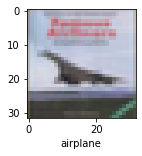

In [89]:
plot_sample(x_test, y_test, 3)

In [90]:
classes[y_classes[3]]

'deer'